# 6.3 Geographic Visualization 
## 01. Import data and libraries
## 02. Data wrangling
## 03. Data cleaning
## 04. Plotting a choropleth

# 01. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
country_geo = r'/Users/brianyoo/Downloads/us-states.json'

In [4]:
f = open(r'/Users/brianyoo/Downloads/us-states.json')

In [5]:
data = json.load(f)

In [6]:
for i in data['features'] :
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [7]:
path = r'/Users/brianyoo/Downloads/CF'

In [8]:
df_clean = pd.read_csv(os.path.join(path, 'Task 6.1', 'USA_cars_datasets.csv'), index_col = 0)

In [9]:
df_clean.head()

,price,brand,model,year,title_status,mileage,color,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours


# 02. Data wrangling

In [10]:
df_clean['state'] = df_clean['state'].str.title()

In [11]:
df_clean.head()

,price,brand,model,year,title_status,mileage,color,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,New Jersey,10 days
1,2899,ford,se,2011,clean vehicle,190552.0,silver,Tennessee,6 days
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,Georgia,2 days
3,25000,ford,door,2014,clean vehicle,64146.0,blue,Virginia,22 hours
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,Florida,22 hours


# 03. Data cleaning

In [12]:
df_clean.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
condition       0
dtype: int64

In [13]:
dups = df_clean.duplicated()

In [14]:
dups.shape 

(2456,)

In [15]:
df_clean.dtypes

price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
state            object
condition        object
dtype: object

# 04. Plotting a choropleth

<AxesSubplot:xlabel='price', ylabel='Count'>

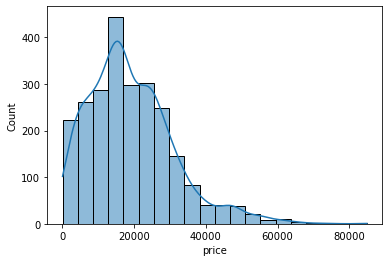

In [16]:
sns.histplot(df_clean['price'], bins=20, kde = True)

<AxesSubplot:xlabel='year', ylabel='Count'>

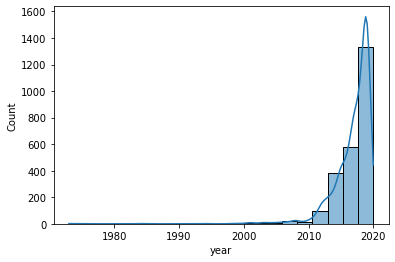

In [17]:
sns.histplot(df_clean['year'], bins=20, kde = True)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

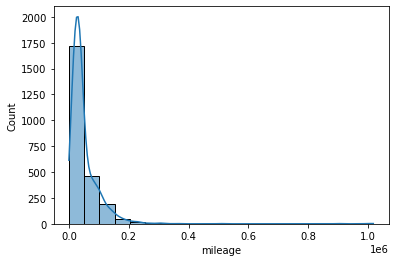

In [18]:
sns.histplot(df_clean['mileage'], bins=20, kde = True)

In [19]:
state_price = df_clean[['state', 'price']]
state_price.head()

,state,price
0,New Jersey,6300
1,Tennessee,2899
2,Georgia,5350
3,Virginia,25000
4,Florida,27700


In [20]:
state_year = df_clean[['state', 'year']]
state_year.head()

,state,year
0,New Jersey,2008
1,Tennessee,2011
2,Georgia,2018
3,Virginia,2014
4,Florida,2018


In [21]:
state_mileage = df_clean[['state', 'mileage']]
state_mileage.head()

,state,mileage
0,New Jersey,274117.0
1,Tennessee,190552.0
2,Georgia,39590.0
3,Virginia,64146.0
4,Florida,6654.0


In [22]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = state_price,
    columns = ['state', 'price'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "price").add_to(map)
folium.LayerControl().add_to(map)

map

Overal price range of US territory is represented above. High-priced and low-priced cars are randomly resulted on the map. Based on this result, one of my question "The cars each state have" can be partially answered. Each state's number of car Possession status cannot be answered, but I can tell Kentucky, New Mexcico, and Nevada have high-priced cars than other states.

In [23]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = state_year,
    columns = ['state', 'year'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "year").add_to(map)
folium.LayerControl().add_to(map)

map

More than half of states show dark brown color. The states with iight brown may related with low number population.
The combination of price and year variable should answer my one of questions "Car price by the year". However,folium
map is not a proper way to represent this question. I need look for other types of visualization to properly answer
my question.

In [24]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = state_mileage,
    columns = ['state', 'mileage'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "mileage").add_to(map)
folium.LayerControl().add_to(map)

map

The result of this map made me think unexpected questions. Overal mileage of US territory is light brwon color except
Montana. The unexpected question is not directly related with this map result, but made me consider further investigation which is "Selling and buying used cars and people's tendency have any relation?

In [25]:
map.save('state.html')